In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("../data/dados_cerveja_nota.xlsx")
df

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20
5,6,4,6.50
6,7,5,2.90
7,8,6,6.20
8,9,6,7.00
9,10,7,6.20


In [4]:
df['aprovado'] = df['nota'] >= 5
df

,id,cerveja,nota,aprovado
0,1,1,0.75,False
1,2,1,3.00,False
2,3,2,1.75,False
3,4,3,1.75,False
4,5,4,4.20,False
5,6,4,6.50,True
6,7,5,2.90,False
7,8,6,6.20,True
8,9,6,7.00,True
9,10,7,6.20,True


In [5]:
features = ['cerveja']
target = 'aprovado'

Modelo de regreção linear

In [9]:
from sklearn import linear_model
reg = linear_model.LogisticRegression(penalty=None,
                                      fit_intercept=True)
reg.fit(df[features],df[target])

LogisticRegression(penalty=None)

In [12]:
#valores previstos pelo modelo
reg_predict = reg.predict(df[features])
reg_predict

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

### Métricas para análisar o desempenho do modelo

In [13]:
from sklearn import metrics

In [ ]:
reg_acc = metrics.accuracy_score(df[target],reg_predict)
print(f"Acurácia regressão logistica:{reg_acc}")
#modelo acerta em 86.6% dos casos

Acurácia regressão logistica:0.8666666666666667


In [ ]:
reg_precision = metrics.precision_score(df[target], reg_predict)
print(f"Precisão regressão logistica:", reg_precision)
# modelo tem a precisão de 88,8%, se o modelo prever "True", ele tem
# 88,8% de probabilidade de acertar

Precisão regressão logistica: 0.8888888888888888


In [19]:
reg_recall = metrics.recall_score(df[target], reg_predict)
print("Recall/Sensibilidade reg log:", reg_recall)
# de todos os verdadeiros positivos, o modelo acertou 88,8%

Recall/Sensibilidade reg log: 0.8888888888888888


In [26]:
reg_conf = metrics.confusion_matrix(df[target], reg_predict)
reg_conf = pd.DataFrame(reg_conf,
                        index=['False', 'True'],
                        columns=['False', 'True'],)
reg_conf



,False,True
False,5,1
True,1,8


A matriz de confusão mostra a quantidade real de positivos e negativos (linhas) e os valores previstos (coluna)

Agora, aplicando as mesmas métricas para outros tipos de modelos, para depois comparar

In [ ]:
from sklearn import tree
arvore = tree.DecisionTreeClassifier(max_depth=3)

arvore.fit(df[features], df[target])

arvore_predict = arvore.predict(df[features])
arvore_predict

arvore_acc = metrics.accuracy_score(df[target], arvore_predict)
print("Acurácia Árvore:", arvore_acc)

arvore_precision = metrics.precision_score(df[target], arvore_predict)
print("Precisão Árvore:", arvore_precision)

arvore_recall = metrics.recall_score(df[target], arvore_predict)
print("Recall Árvore:", arvore_recall)

arvore_conf = metrics.confusion_matrix(df[target], arvore_predict)
arvore_conf

Acurácia Árvore: 0.9333333333333333
Precisão Árvore: 1.0
Recall Árvore: 0.8888888888888888


array([[6, 0],
       [1, 8]])

In [28]:
from sklearn import naive_bayes
nb = naive_bayes.GaussianNB()

nb.fit(df[features], df[target])

nb_predict = nb.predict(df[features])
nb_predict

nb_acc = metrics.accuracy_score(df[target], nb_predict)
print("Acurácia Naive Bayes:", nb_acc)

nb_precision = metrics.precision_score(df[target], nb_predict)
print("Precisão Naive Bayes:", nb_precision)

nb_recall = metrics.recall_score(df[target], nb_predict)
print("Recall NB:", nb_recall)

nb_conf = metrics.confusion_matrix(df[target], nb_predict)
nb_conf

Acurácia Naive Bayes: 0.8666666666666667
Precisão Naive Bayes: 0.8888888888888888
Recall NB: 0.8888888888888888


array([[5, 1],
       [1, 8]])

Por padrão, o sklearn calcula a probabilididade da decisão é superior a 0.5, podemos verificar todas as porcentagens de probabilidades, e acessar utilizando o **predict_proba**

In [36]:
nb_proba = nb.predict_proba(df[features])[:,1]
nb_predict = nb_proba > 0.2

nb_acc = metrics.accuracy_score(df[target], nb_predict)
print("Acurácia Naive Bayes:", nb_acc)

nb_precision = metrics.precision_score(df[target], nb_predict)
print("Precisão Naive Bayes:", nb_precision)

nb_recall = metrics.recall_score(df[target], nb_predict)
print("Recall NB:", nb_recall)
#em comparação com o modelo anterior, a precisão diminuiu e o recall aumentou

Acurácia Naive Bayes: 0.8666666666666667
Precisão Naive Bayes: 0.8181818181818182
Recall NB: 1.0


Por último a curva de roc é uma curva que demonstra a qualidade de um modelo de classificação, quanto mais pra cima e pra esquerda (ou valor próximo a 1), melhor o modelo

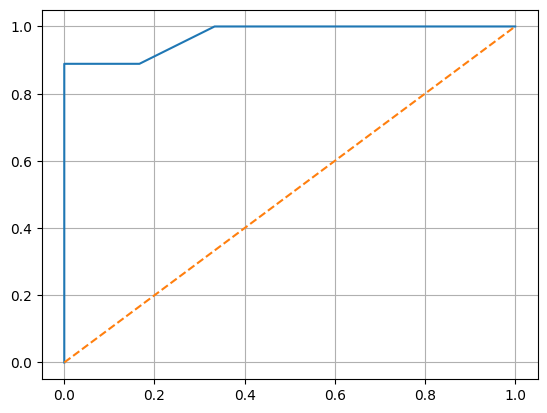

In [39]:
import matplotlib.pyplot as plt

roc_curve = metrics.roc_curve(df[target], nb_proba)
plt.plot(roc_curve[0], roc_curve[1] )
plt.grid(True)
plt.plot([0,1], [0,1], '--')
plt.show()

In [40]:
roc_auc = metrics.roc_auc_score(df[target], nb_proba)
roc_auc

np.float64(0.9722222222222223)